In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
# Load dataset
df_x = pd.read_excel("Rotten_Tomatoes_Movies3.xls")
df_x.to_csv("Rotten_Tomatoes_Movies3.csv", index=None, header=True)

df = pd.DataFrame(pd.read_csv("Rotten_Tomatoes_Movies3.csv"))

In [3]:
print("Dataset Shape:", df.shape)


Dataset Shape: (16638, 16)


In [4]:
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  flo

In [5]:
print("Column Names:", df.columns)
print("Data Types:", df.dtypes)

Column Names: Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')
Data Types: movie_title            object
movie_info             object
critics_consensus      object
rating                 object
genre                  object
directors              object
writers                object
cast                   object
in_theaters_date       object
on_streaming_date      object
runtime_in_minutes    float64
studio_name            object
tomatometer_status     object
tomatometer_rating      int64
tomatometer_count       int64
audience_rating       float64
dtype: object


In [6]:
# Summary statistics
print("Missing Values:")
print(df.isna().sum())

Missing Values:
movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64


VISUALIZATION

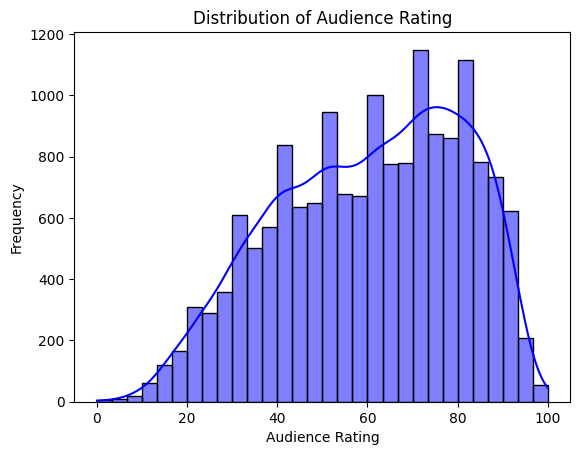

In [7]:
sns.histplot(df['audience_rating'], kde=True, bins=30, color='blue')
plt.title('Distribution of Audience Rating')
plt.xlabel('Audience Rating')
plt.ylabel('Frequency')
plt.show()


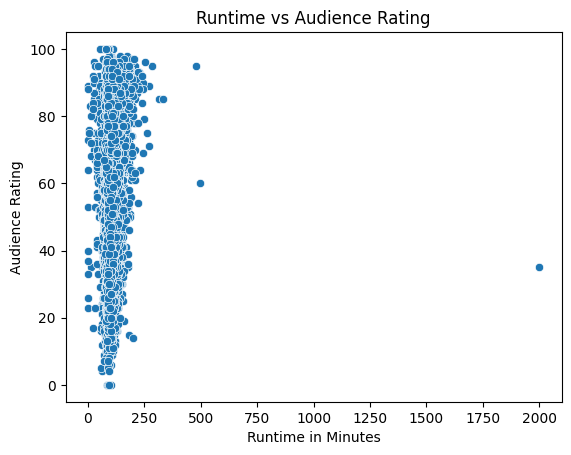

In [10]:
sns.scatterplot(x=df['runtime_in_minutes'], y=df['audience_rating'])
plt.title('Runtime vs Audience Rating')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Audience Rating')
plt.show()


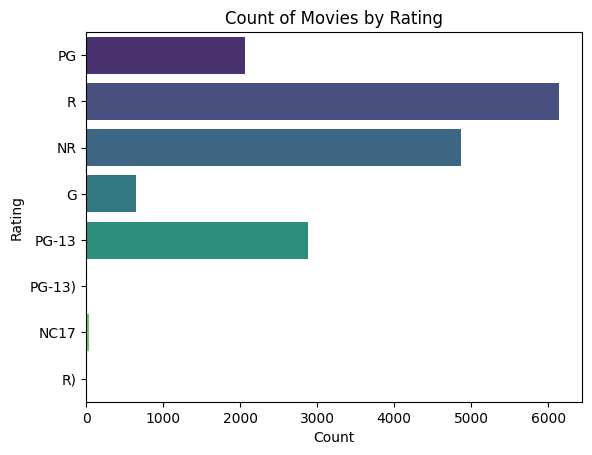

In [11]:
sns.countplot(y=df['rating'], palette='viridis')
plt.title('Count of Movies by Rating')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


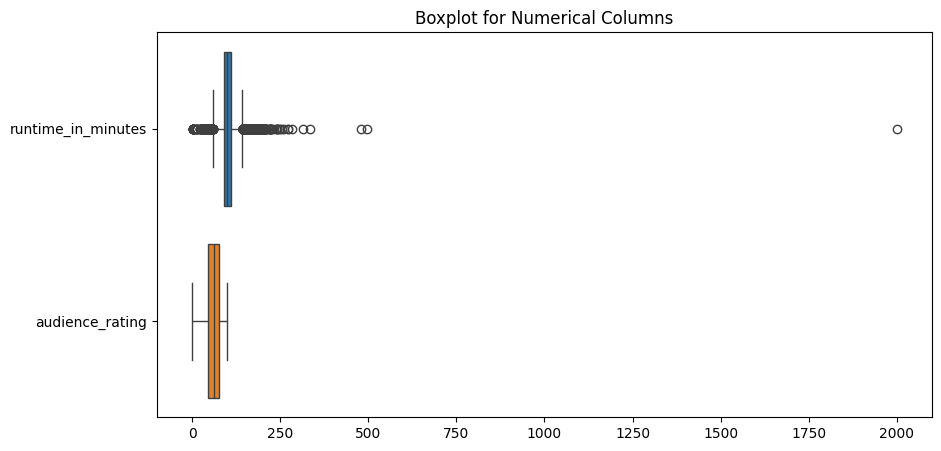

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['runtime_in_minutes', 'audience_rating']], orient='h')
plt.title('Boxplot for Numerical Columns')
plt.show()


EDA

In [13]:
# Fill missing values
columns_fill_mean = ["runtime_in_minutes", "audience_rating", "tomatometer_rating", "tomatometer_count"]
column_means = df[columns_fill_mean].mean()
df[columns_fill_mean] = df[columns_fill_mean].fillna(column_means)

columns_fill_mode = ['movie_title','movie_info', 'critics_consensus', 'rating','genre','directors','writers','cast','in_theaters_date',
                     'on_streaming_date','studio_name']
columns_modes = df[columns_fill_mode].mode().iloc[0]
df[columns_fill_mode] = df[columns_fill_mode].fillna(columns_modes)

In [14]:
# Data Cleaning
df['rating'] = df['rating'].str.replace(')', '')
df['release_year'] = pd.to_datetime(df['in_theaters_date']).dt.year
df['streamed_year'] = pd.to_datetime(df['on_streaming_date']).dt.year

In [15]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,release_year,streamed_year
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,2010,2010
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,2010,2010
2,10,Blake Edwards' 10 stars Dudley Moore as George...,"Extinction has a few intriguing ideas, but the...",R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,1979,1997
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,1957,2001
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,1954,2003


In [16]:
df.rating.value_counts()

,count
rating,
R,6137
NR,4862
PG-13,2888
PG,2062
G,652
NC17,37


In [17]:
# Encode categorical data
OE = OrdinalEncoder()
df['genre_en'] = OE.fit_transform(df[['genre']])
df['rating_en'] = OE.fit_transform(df[['rating']])
df['tomatometer_status_en'] = OE.fit_transform(df[['tomatometer_status']])

In [18]:
# Visualization: Distributions and Outliers
def plot_distributions(df, columns):
    for column in columns:
        plt.figure(figsize=(20, 5))
        plt.subplot(1, 3, 1)
        sns.boxplot(data=df, x=column)
        plt.title(f'Box Plot for {column}')

        plt.subplot(1, 3, 2)
        sns.histplot(data=df, x=column, kde=True, bins=50)
        plt.title(f'Distribution Plot for {column}')

        plt.subplot(1, 3, 3)
        sns.violinplot(data=df, x=column)
        plt.title(f'Violin Plot for {column}')

        plt.show()

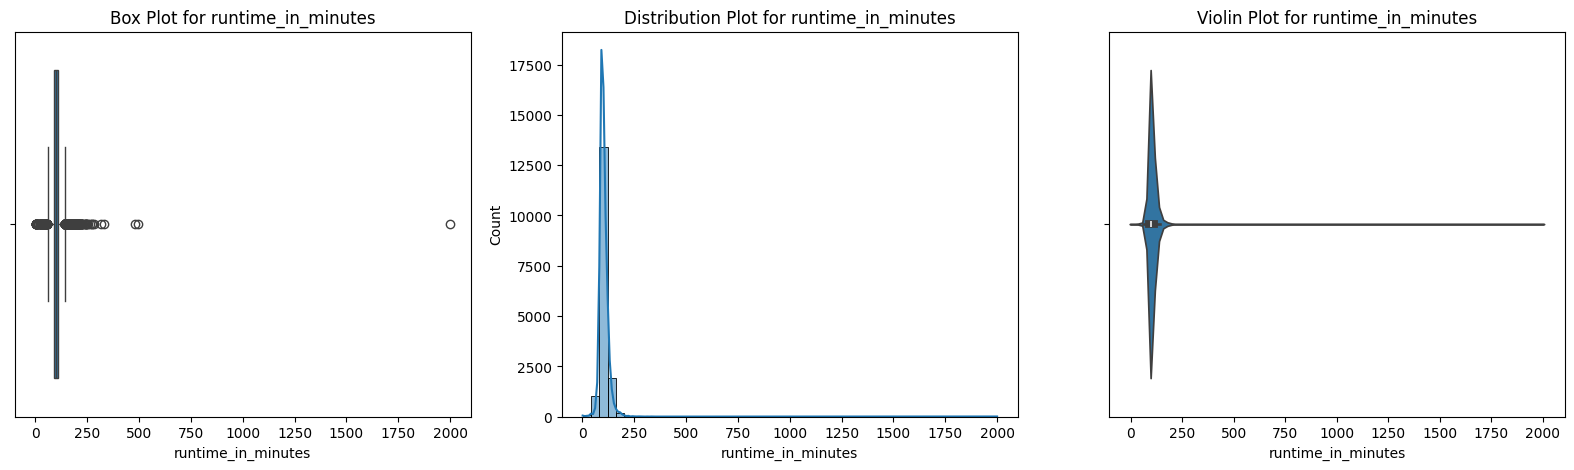

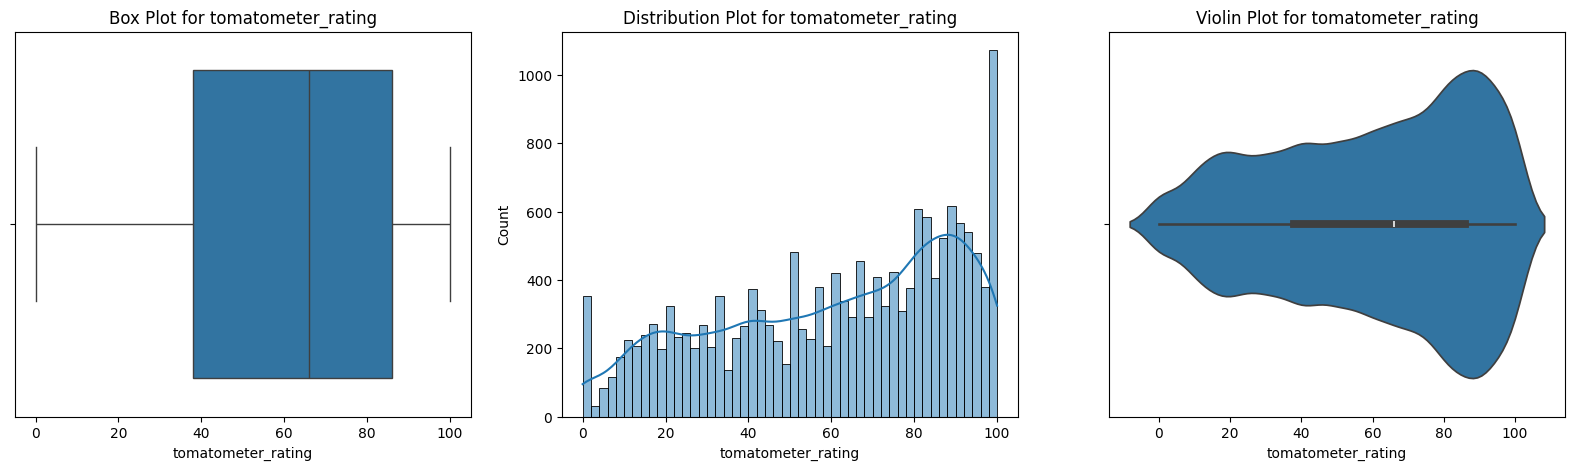

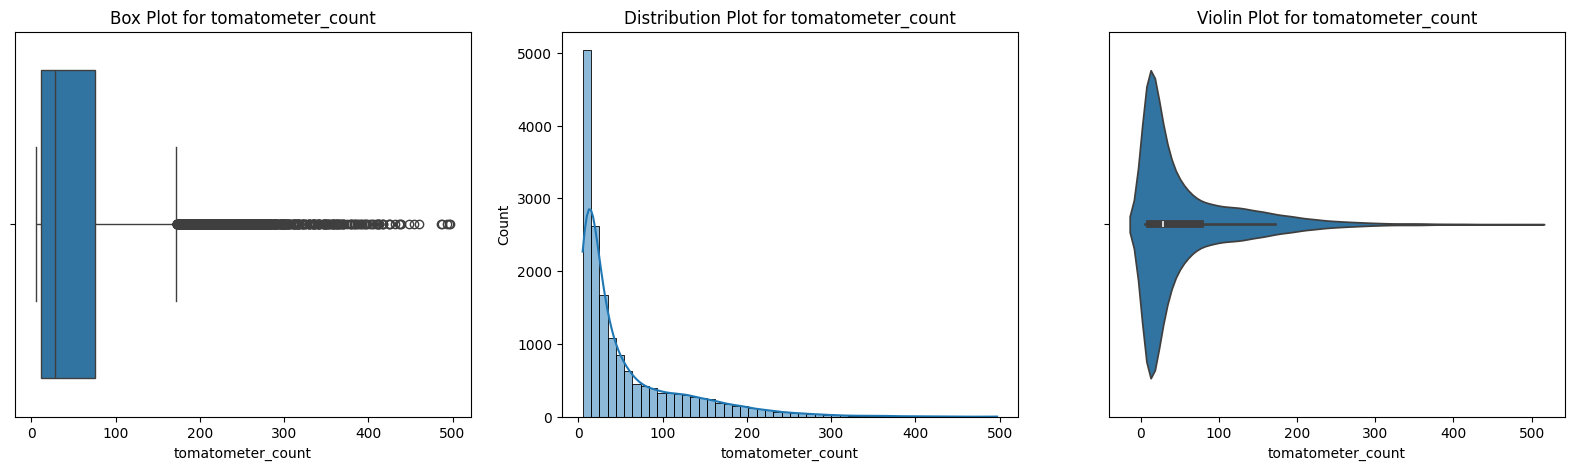

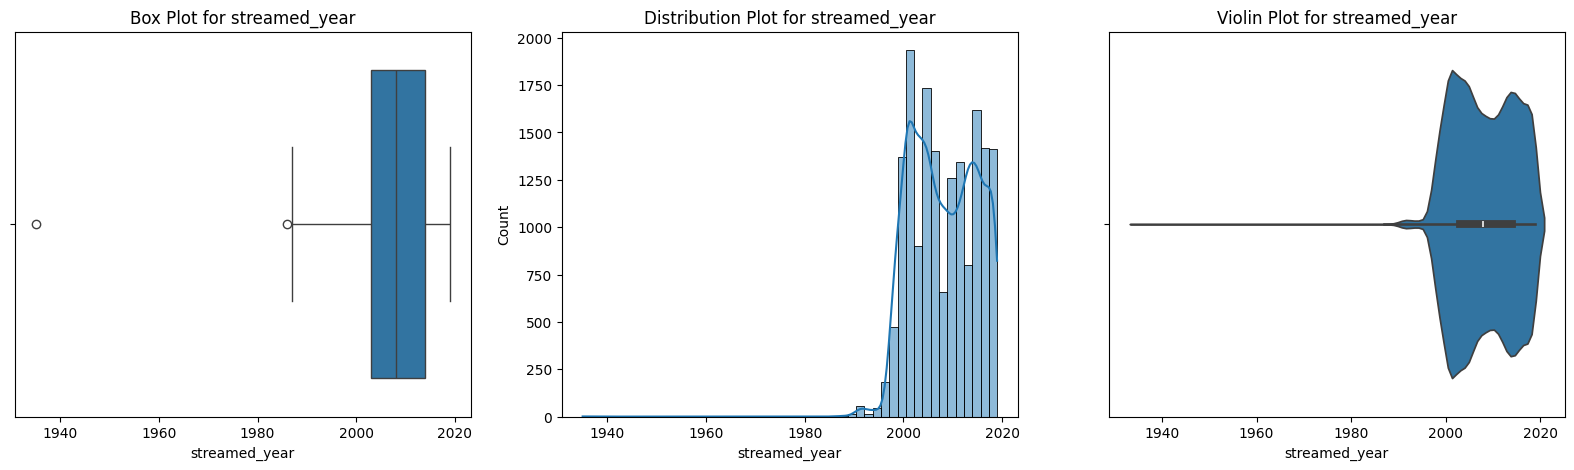

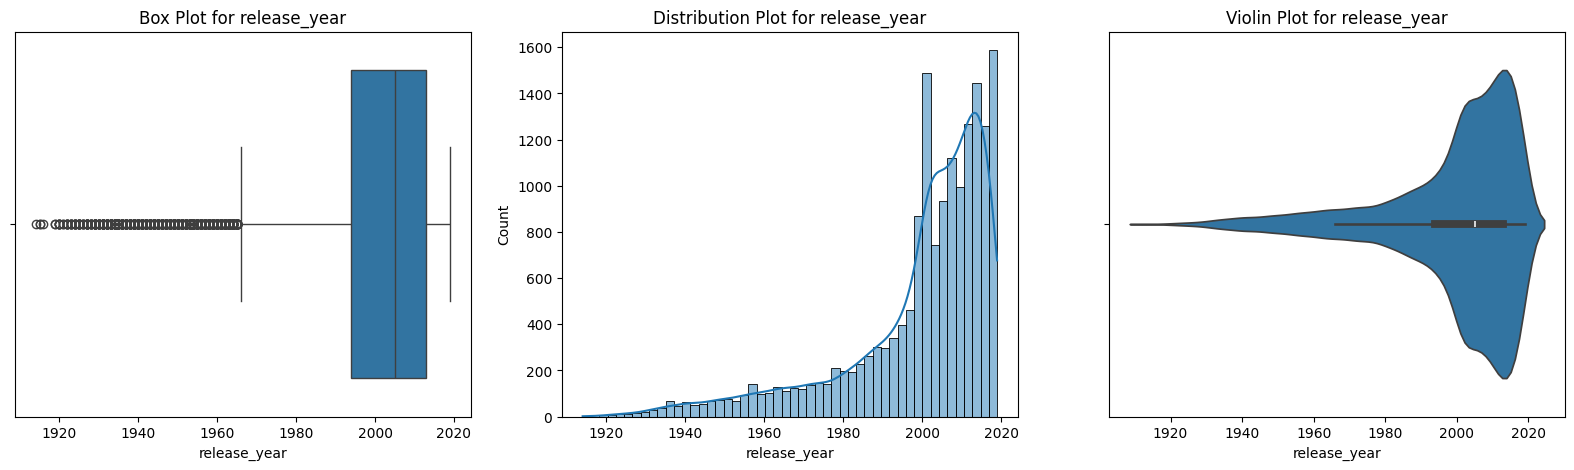

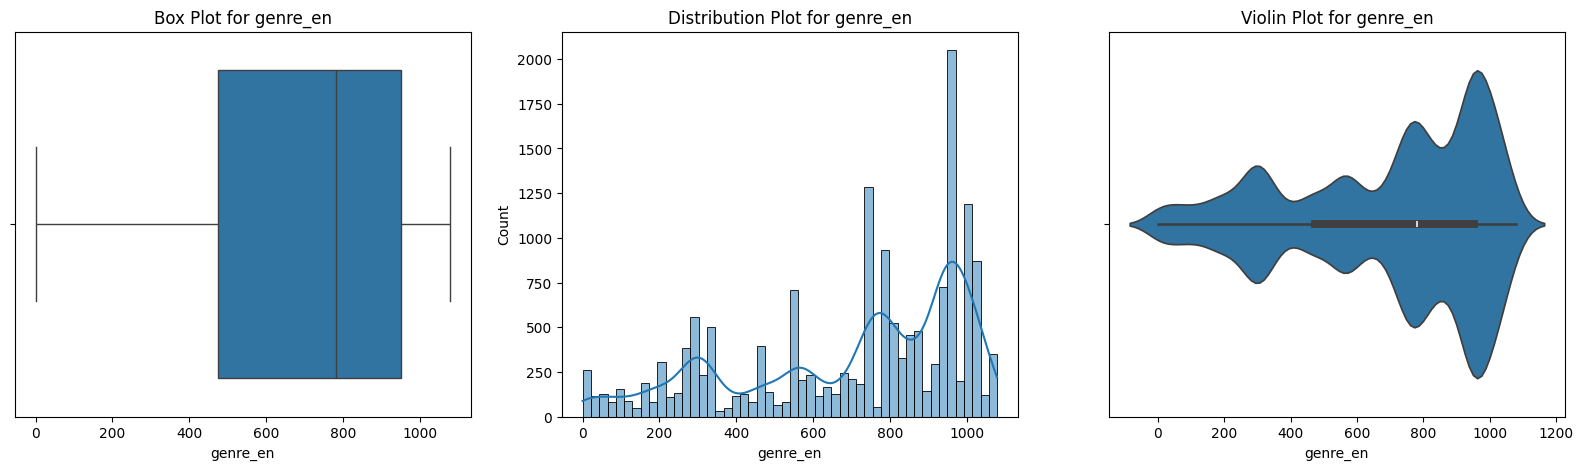

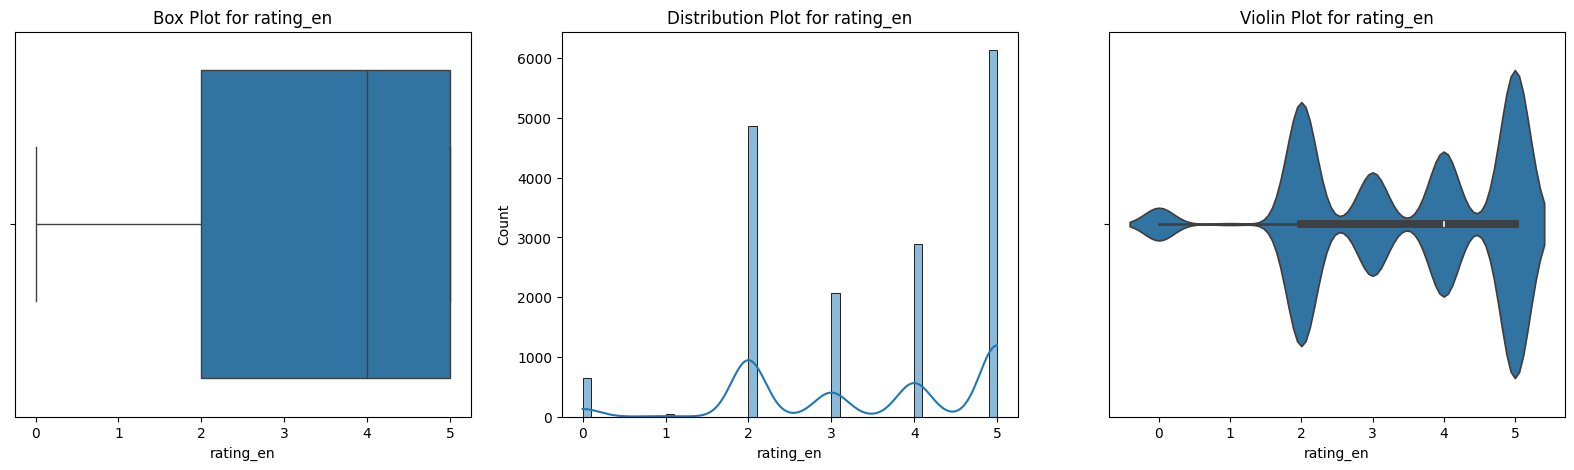

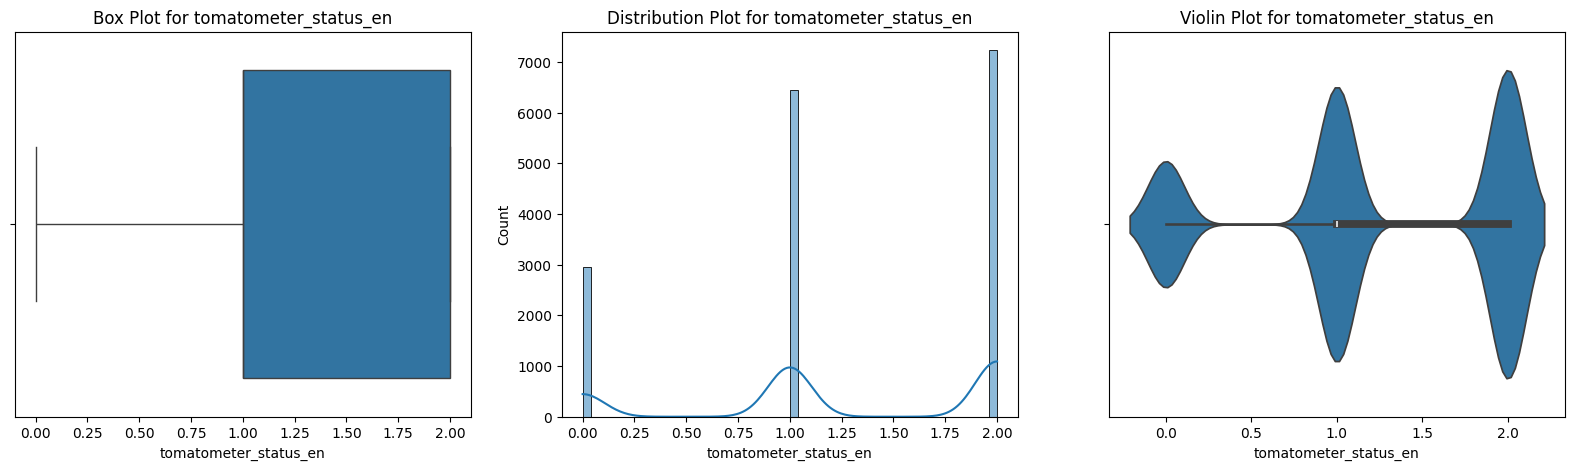

In [19]:
plot_columns = ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 'streamed_year', 'release_year',
                'genre_en', 'rating_en', 'tomatometer_status_en']
plot_distributions(df, plot_columns)

In [ ]:
#from the above diagrams, we can see the outliers isn't much present on any columns. Still we can remove few outliers for perfect prediction

In [20]:
# Outlier detection and removal
numeric_df = df.select_dtypes(include=['float64', 'int64'])
outlier_columns = numeric_df.columns.tolist()

In [21]:
for column in outlier_columns:
    Q1 = numeric_df[column].quantile(0.25)
    Q3 = numeric_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    numeric_df = numeric_df[(numeric_df[column] >= lower_bound) & (numeric_df[column] <= upper_bound)]


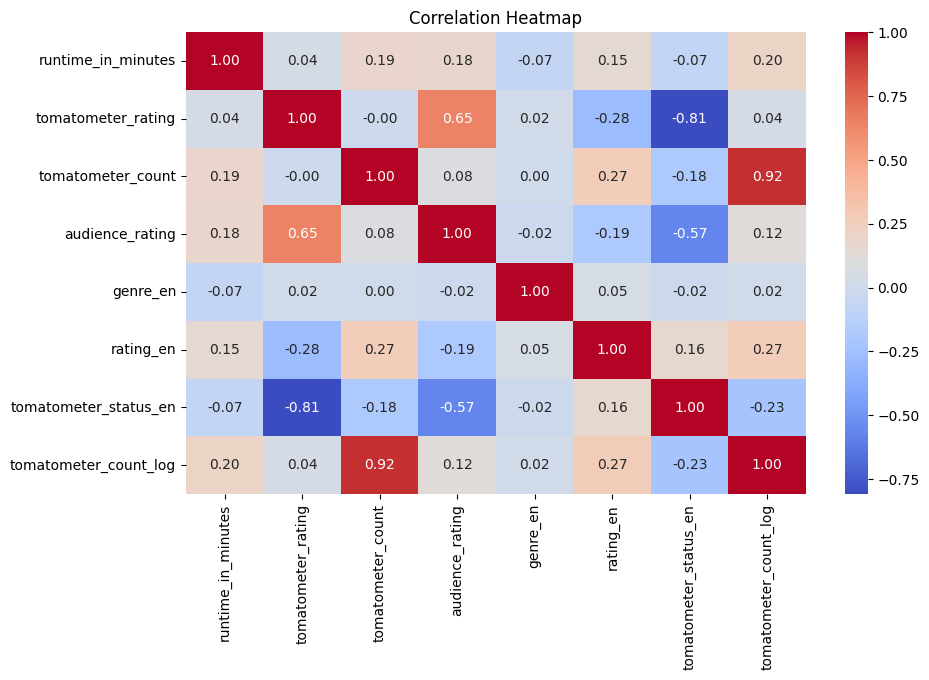

In [28]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [23]:
# Apply transformations
numeric_df['tomatometer_count_log'] = np.log(numeric_df['tomatometer_count'] + 1)

# Skewness calculation
print("Skewness after transformation:")
print(numeric_df.skew())

Skewness after transformation:
runtime_in_minutes       0.440753
tomatometer_rating      -0.354836
tomatometer_count        1.367236
audience_rating         -0.257613
genre_en                -0.801465
rating_en               -0.412860
tomatometer_status_en   -0.527174
tomatometer_count_log    0.177024
dtype: float64


MODEL BUILDING

In [24]:
# For model building, we need to drop some columns, tomatometer_status_en and tomatometer_count can be dropped due to high skewness and much correlated
# Prepare data for modeling
df_final = numeric_df.drop(['tomatometer_status_en', 'tomatometer_count'], axis=1)
X = df_final[['runtime_in_minutes', 'tomatometer_rating', 'genre_en', 'rating_en', 'tomatometer_count_log']]
y = df_final['audience_rating']

In [25]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (10388, 5)
Test set shape: (4452, 5)


In [26]:
# Model training and evaluation
models = {
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'LinearRegression': LinearRegression()
}

In [29]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Model:\n  MSE: {mse:.2f}\n  MAE: {mae:.2f}\n RMSE: {rmse:.2f}\n  R2 Score: {r2:.2f}\n")

DecisionTree Model:
  MSE: 421.95
  MAE: 16.09
 RMSE: 20.54
  R2 Score: -0.02

RandomForest Model:
  MSE: 220.52
  MAE: 11.74
 RMSE: 14.85
  R2 Score: 0.47

GradientBoosting Model:
  MSE: 200.72
  MAE: 11.24
 RMSE: 14.17
  R2 Score: 0.52

LinearRegression Model:
  MSE: 227.93
  MAE: 12.12
 RMSE: 15.10
  R2 Score: 0.45



In [30]:
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse, 'MAE': mae, 'RMSE':rmse, 'R2 Score': r2})

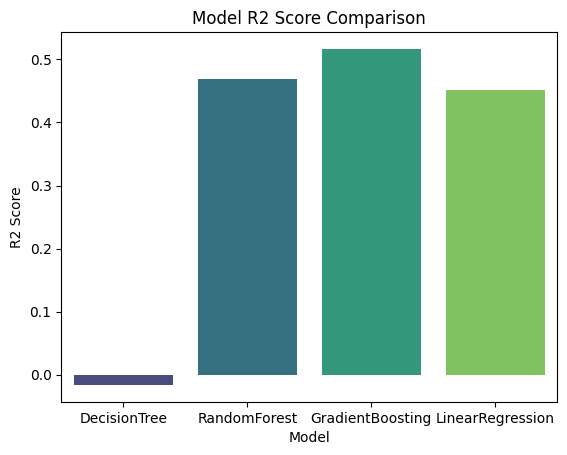

In [31]:
results_df = pd.DataFrame(results)
sns.barplot(data=results_df, x='Model', y='R2 Score', palette='viridis')
plt.title("Model R2 Score Comparison")
plt.show()

From this observation, GradientBoosting model performs well


In [57]:
# Train GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Evaluate model
y_pred = gbr.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.5166042014807364
MSE: 200.72296901811958


In [58]:
# Predict new sample
data = {
    "runtime_in_minutes": 220,
    "tomatometer_rating": 15,
    "genre_en": 3.0,
    "rating_en": 2.0,
    "tomatometer_count_log": np.log(50)
}

new_sample = np.array([[data['runtime_in_minutes'], data['tomatometer_rating'], data['genre_en'], data['rating_en'], data['tomatometer_count_log']]])
feature_names = ['runtime_in_minutes', 'tomatometer_rating', 'genre_en', 'rating_en', 'tomatometer_count_log']

new_pred = gbr.predict(new_sample)
print("Predicted Audience Rating:", new_pred)

Predicted Audience Rating: [33.69011201]


In [23]:
#Completed Machine Learning Part.
#For further analysis, We can use Deep Learning models.
#Neural Networks

In [69]:
!pip install keras
!pip install tensorflow

In [62]:
# Ensure X and y have consistent lengths by dropping rows with missing values
df3 = df_final[['runtime_in_minutes', 'tomatometer_rating', 'genre_en', 'rating_en', 'tomatometer_count_log', 'audience_rating']].dropna()

# Prepare X (features) and y (target)
X = df3[['runtime_in_minutes', 'tomatometer_rating', 'genre_en', 'rating_en', 'tomatometer_count_log']]
y = df3['audience_rating']

# Double-check lengths to avoid mismatch errors
assert len(X) == len(y), "Features (X) and target (y) have inconsistent lengths."


(16638, 5)
(14840,)


In [68]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Define the neural network architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Normalize the data for better performance of the neural network
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Regression problem (linear output)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, mse = model.evaluate(X_test_scaled, y_test)
print(f"Neural Network MSE: {mse}")

# Predict new sample (scaled)
new_sample_scaled = scaler.transform(new_sample)
nn_pred = model.predict(new_sample_scaled)
print("Predicted Audience Rating (Neural Network):", nn_pred[0][0])


Epoch 1/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 2711.3171 - mse: 2711.3171 - val_loss: 295.8617 - val_mse: 295.8617
Epoch 2/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 317.2375 - mse: 317.2375 - val_loss: 265.4006 - val_mse: 265.4006
Epoch 3/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 286.6433 - mse: 286.6433 - val_loss: 248.8181 - val_mse: 248.8181
Epoch 4/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 271.5054 - mse: 271.5054 - val_loss: 239.1031 - val_mse: 239.1031
Epoch 5/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 257.8373 - mse: 257.8373 - val_loss: 233.6015 - val_mse: 233.6015
Epoch 6/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 257.3881 - mse: 257.3881 - val_loss: 231.4595 - val_mse: 231.4595
Epoch 7/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 251.7194 - mse: 251.7194 - val_loss: 227.8683 - val_mse: 227.8683
Epoch 8/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 241.1754 - mse: 241.1754 - val_loss: 228.4010 - val_mse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Audience Rating (Neural Network): 77.85185


In [44]:
!pip install nltk

In [47]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Extract sentiment from critic reviews
df['sentiment_score'] = df['critics_consensus'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Incorporate sentiment score into the model
X = df[['runtime_in_minutes', 'tomatometer_rating', 'genre_en', 'rating_en', 'sentiment_score']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
X.head()

,runtime_in_minutes,tomatometer_rating,genre_en,rating_en,sentiment_score
0,83.0,49,217.0,3.0,0.9274
1,90.0,86,752.0,5.0,0.5023
2,118.0,68,860.0,5.0,-0.3291
3,95.0,100,689.0,2.0,0.5423
4,127.0,89,286.0,0.0,0.7579
